# Function calling: *part two*
Source: YouTube [video](https://www.youtube.com/watch?v=3F55ZQWcwW4) by ***Prompt Engineering***.

Tool/Function Calling

*Function calling is the ability to reliably connect LLMs to external tools to enable effective tool usage and interaction with external APIs.*

This is often a fine-tuned feature, not available to all models, but super useful where it is!

## Common use cases

Function calling allows you to more reliably get structured data back from the model. For example, you can:

* Create assistants that answer questions by calling external APIs
     * e.g. define functions like `send_email(to: string, body: string)`, or `get_current_weather(location: string, unit: 'celsius' | 'fahrenheit')`
* Convert natural language into API calls
     * e.g. convert "Who are my top customers?" to `get_customers(min_revenue: int, created_before: string, limit: int)` and call your internal API
* Extract structured data from text
     * e.g. define a function called `extract_data(name: string, birthday: string)`, or `sql_query(query: string)`
 
## The basic sequence of steps for function calling is as follows:

1. Call the model with the user query and a set of functions defined in the functions parameter.
1. The model can choose to call one or more functions; if so, the content will be a stringified JSON object adhering to your custom schema
1. Parse the string into JSON in your code, and call your function with the provided arguments if they exist.
1. Call the model again by appending the function response as a new message, and let the model summarize the results back to the user.

While the name implies that the model is performing some action, this is actually not the case! The model is coming up with the arguments to a tool, and actually running the tool (or not) is up to the user

In [1]:
from openai import OpenAI
from dotenv import load_dotenv
import json
load_dotenv()
client = OpenAI()
type(client)

openai.OpenAI

In [2]:
MODEL = "gpt-4o"
MODEL

'gpt-4o'

In [3]:
completion = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant. Help me with my math homework!" # This is the system message. It specifies the systems role / behaviour.
        },
        {
            "role": "user",
            "content": "Hello! Could you solve 2+2?" # This is the user message. The model will return an according reply.
        }
    ]
)
print(f"Assistant:\n{completion.choices[0].message.content}")

Assistant:
Sure! \( 2 + 2 = 4 \). If you have any other questions or need further help, feel free to ask!


In [4]:
completion = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "user",
            "content": "What is your name and who created you? What is your training cutoff date?"
        }
    ]
)
print(f"Assistant:\n{completion.choices[0].message.content}")

Assistant:
I'm called ChatGPT, and I was created by OpenAI. My training data includes information up to September 2021. How can I assist you today?


## JSON mode for function calling

In [5]:
completion = client.chat.completions.create(
    model=MODEL,
    response_format={
        "type": "json_object"
    },
    messages=[
        {
            "role": "system",
            "content": "You are a trainer who always responds in JSON."
        },
        {
            "role": "user",
            "content": "Create a weekly workout routine for me!"
        }
    ]
)
print(completion.choices[0].message.content)

{
  "weekly_workout_routine": {
    "Monday": {
      "workout": "Full Body Strength Training",
      "exercises": [
        {
          "name": "Squats",
          "sets": 3,
          "reps": 12
        },
        {
          "name": "Bench Press",
          "sets": 3,
          "reps": 10
        },
        {
          "name": "Bent Over Rows",
          "sets": 3,
          "reps": 12
        },
        {
          "name": "Overhead Press",
          "sets": 3,
          "reps": 10
        },
        {
          "name": "Deadlifts",
          "sets": 3,
          "reps": 10
        }
      ]
    },
    "Tuesday": {
      "workout": "Cardio",
      "exercises": [
        {
          "name": "Running",
          "duration": "30 minutes"
        },
        {
          "name": "Cycling",
          "duration": "30 minutes"
        }
      ]
    },
    "Wednesday": {
      "workout": "Lower Body Strength Training",
      "exercises": [
        {
          "name": "Leg Press",
          "

## Image understanding
For context, let's preview the image that we want to understand.

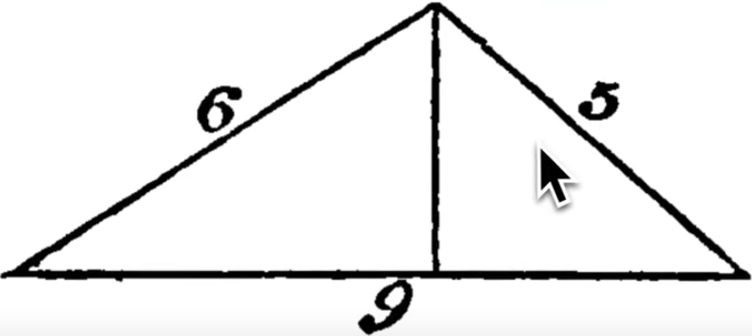

In [6]:
from IPython.display import Image, display, Audio, Markdown
import base64
IMAGE_PATH = "triangle.png"
display(Image(IMAGE_PATH))

### Base64 image processing
Open the image file and encode it as a `base64` string.

In [7]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")
#
base64_image = encode_image(IMAGE_PATH)
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text", "text": "What's the area of the triangle?"
                },
                {
                    "type": "image_url", "image_url": {
                        "url": f"data:image/png;base64,{base64_image}"
                    }
                }
            ]
        }
    ],
    temperature=0.0,
)
print(response.choices[0].message.content)

To find the area of the triangle, we can use the formula for the area of a triangle:

\[ \text{Area} = \frac{1}{2} \times \text{base} \times \text{height} \]

In this case, the base of the triangle is given as 9 units. To find the height, we can use the Pythagorean theorem on one of the right triangles formed by the height.

Let's denote the height as \( h \). The triangle is split into two right triangles with bases of 4.5 units each (since the base is 9 units and the height splits it into two equal parts).

For the left triangle:
\[ 6^2 = 4.5^2 + h^2 \]
\[ 36 = 20.25 + h^2 \]
\[ h^2 = 36 - 20.25 \]
\[ h^2 = 15.75 \]
\[ h = \sqrt{15.75} \]
\[ h \approx 3.97 \]

Now, we can calculate the area:
\[ \text{Area} = \frac{1}{2} \times 9 \times 3.97 \]
\[ \text{Area} \approx \frac{1}{2} \times 9 \times 3.97 \]
\[ \text{Area} \approx 17.865 \]

So, the area of the triangle is approximately \( 17.865 \) square units.


### URL image processing
Have a look at the [online picture](https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png)!

In [8]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What's the area of the triangle?"
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png"
                    }
                }
            ]
        }
    ],
    temperature=0.0,
)
print(response.choices[0].message.content)

To find the area of the triangle, we can use Heron's formula. First, we need to find the semi-perimeter of the triangle.

The sides of the triangle are 6, 5, and 9.

The semi-perimeter \( s \) is calculated as:
\[ s = \frac{a + b + c}{2} \]
where \( a = 6 \), \( b = 5 \), and \( c = 9 \).

\[ s = \frac{6 + 5 + 9}{2} = \frac{20}{2} = 10 \]

Now, we can use Heron's formula to find the area \( A \):
\[ A = \sqrt{s(s-a)(s-b)(s-c)} \]

Substitute the values:
\[ A = \sqrt{10(10-6)(10-5)(10-9)} \]
\[ A = \sqrt{10 \cdot 4 \cdot 5 \cdot 1} \]
\[ A = \sqrt{200} \]
\[ A = 10\sqrt{2} \]

So, the area of the triangle is \( 10\sqrt{2} \) square units.


## Further image processing

### Bar chart
**Display** the bar chart via its `url`:

In [9]:
from IPython.display import Image
from IPython.core.display import HTML
imgurl = "https://images.ctfassets.net/kftzwdyauwt9/3Y5UXKbx1ZIQYF4dg585eH/1a6da79d0ab3b8d3a2fd23aae1f21075/gpt-40-01_dark.png"
Image(url=imgurl, width=450)

**Analyse** the bar chart via its `url`:

In [10]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant that responds in Markdown"
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Can you explain what you see in this image?"
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://images.ctfassets.net/kftzwdyauwt9/3Y5UXKbx1ZIQYF4dg585eH/1a6da79d0ab3b8d3a2fd23aae1f21075/gpt-40-01_dark.png"
                    }
                }
            ]
        }
    ],
    temperature=0.0,
)
print(response.choices[0].message.content)

This image is a bar chart titled "Text Evaluation" that compares the performance of various models across different evaluation metrics. The models compared are:

- GPT-4o (pink)
- GPT-4T (red)
- GPT-4 (initial release 23-03-14) (orange)
- Claude 3 Opus (green)
- Gemini Pro 1.5 (yellow)
- Gemini Ultra 1.0 (blue)
- Llama3 400b (light blue)

The evaluation metrics are:

1. MMLU (%)
2. GPCQA (%)
3. MATH (%)
4. HumanEval (%)
5. MGSM (%)
6. DROP (f1)

Each metric has a corresponding set of bars representing the performance of each model. Here are the observations for each metric:

1. **MMLU (%)**:
   - GPT-4o: 88.7%
   - GPT-4T: 86.8%
   - GPT-4 (initial release 23-03-14): 86.8%
   - Claude 3 Opus: 83.7%
   - Gemini Pro 1.5: 81.9%
   - Gemini Ultra 1.0: 86.1%
   - Llama3 400b: 81.9%

2. **GPCQA (%)**:
   - GPT-4o: 53.6%
   - GPT-4T: 48.0%
   - GPT-4 (initial release 23-03-14): 50.4%
   - Claude 3 Opus: 48.0%
   - Gemini Pro 1.5: 35.7%
   - Gemini Ultra 1.0: N/A
   - Llama3 400b: N/A

3. **MA

### Beard image
**Display** the beard image via its `url`:

In [11]:
imgurl = "https://pbs.twimg.com/media/GNeb4-Ua8AAuaKp?format=png&name=small"
Image(url=imgurl, width=250)#, height=100)

**Analyse** the beard image via its `url`:

In [12]:
#  man with beard
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown"},
        {"role": "user", "content": [
            {"type": "text", "text": "What do you see in this image? How would you describe the emotion shown?"},
            {"type": "image_url", "image_url": {
                "url": f"{imgurl}"}
            }
        ]}
    ],
    temperature=0.0,
)
print(response.choices[0].message.content)

In the image, there is a person who appears to be smiling. The emotion shown can be described as happy or content. The smile suggests a positive and pleasant mood.


## Function calling

Set some fantasy results of NBA games.

In [13]:
# Mock function to get NBA game scores
def get_nba_game_score(team):
    print("get_nba_game_score called")
    if "lakers" in team.lower():
        return json.dumps({"team": "Lakers", "score": "102", "opponent": "Warriors", "opponent_score": "98"})
    elif "bulls" in team.lower():
        return json.dumps({"team": "Bulls", "score": "89", "opponent": "Celtics", "opponent_score": "95"})
    else:
        return json.dumps({"team": team, "score": "N/A", "opponent": "N/A", "opponent_score": "N/A"})

get_nba_game_score

<function __main__.get_nba_game_score(team)>

Retrieve the above results using a function call.

In [14]:
team = "Bulls" # "Lakers" or "Bulls"
def function_calling():
    # Step 1: Initialize conversation with the user's message
    messages = [{"role": "user", "content": f"What's the score of the {team} game?"}]
    # Define available tools (functions) the model can use
    tools = [
        {
            "type": "function",
            "function": {
                "name": "get_nba_game_score",
                "description": "Get the current score of an NBA game for a given team",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "team": {
                            "type": "string",
                            "description": "The name of the NBA team, e.g. Lakers, Bulls",
                        },
                    },
                    "required": ["team"],
                },
            },
        }
    ]
    # Step 2: Send the conversation context and available tools to the model
    response = client.chat.completions.create(
        model=MODEL,
        messages=messages,
        tools=tools,
        tool_choice="auto",  # auto is default, but we'll be explicit
    )
    # Extract the response from the model
    response_message = response.choices[0].message
    tool_calls = response_message.tool_calls  # Check if the model wants to call any tools
    # Step 3: Check if there are any tool calls requested by the model
    if tool_calls:
        # Define available functions
        available_functions = {
            "get_nba_game_score": get_nba_game_score,
        }  # Only one function in this example, but can be extended
        # Add the model's response to the conversation history
        messages.append(response_message)
        # Step 4: Call the function requested by the model
        for tool_call in tool_calls:
            function_name = tool_call.function.name
            function_to_call = available_functions[function_name]
            function_args = json.loads(tool_call.function.arguments)
            print(f"Tool call: {tool_call}")
            # Call the function with the extracted arguments
            function_response = function_to_call(
                team=function_args.get("team"),
            )
            # Add the function response to the conversation history
            messages.append(
                {
                    "tool_call_id": tool_call.id,
                    "role": "tool",
                    "name": function_name,
                    "content": function_response,
                }
            )
        # Step 5: Continue the conversation with the updated history
        second_response = client.chat.completions.create(
            model=MODEL,
            messages=messages,
        )  # Get a new response from the model where it can see the function response
        return second_response

# Run the conversation and print the result
result = function_calling().choices[0].message.content
print(f"\n{result}")

Tool call: ChatCompletionMessageToolCall(id='call_SdR1QvTY0COQZv12BQRCBfTD', function=Function(arguments='{"team":"Bulls"}', name='get_nba_game_score'), type='function')
get_nba_game_score called

The latest score for the Bulls game is Bulls 89, Celtics 95.


$\checkmark$